# Clasificación de cancer con una red neuronal

En este notebook se va a desarrollar la implementación de una red neuronal de 3 capas, con 9 entredas, 15 neuronas en la capa oculta y una neurona con funcion de salida sigmoide en la última capa. El objetivo es determinar, partiendo de un csv, la naturaleza de los tumores en funcion de sus características.
Para el mejor entendimiento del ejercicio, el notebook se separa en dos secciones:
- Preparación de los datos.
- Instanciación de la red neuronal (desarrollada en NeuronalNetwork.py) y uso con los parámetros más óptimos encontrados.

## Preparación de los datos

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import mean_squared_error 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns
from NeuronalNetwork_regularized import *

### Load and format data

El dataset viene con la salida defindia como 2 ó 4, la cambiamos a 0 ó 1 para poder trabajar. También se eliminan aquellas filas con algún valor nulo. <br> Las entradas de la red neuronal corresponderán a: 
- Clump Thickness
- Uniformity of Cell Size
- Uniformity of Cell Shape
- Marginal Adhesion
- Single Epithelial Cell Size
- Bare Nuclei
- Bland Chromatin
- Normal Nucleoli 
- Mitoses

In [2]:
#load and format data
df = pd.read_csv('wisconsin-cancer-dataset.csv',header=None)
df.head(5)
df.iloc[:,10].replace(2, 0,inplace=True)
df.iloc[:,10].replace(4, 1,inplace=True)
df = df[~df[6].isin(['?'])]
df = df.astype(float)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,0.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,0.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,0.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,0.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,0.0


### Feature Normalization

Se normaliza las características para acotarlas todas en un intervalo entre 0 y 1, con el objetivo de que ninguna de ellas condicione en exceso el ejercicio o pase desapercibida. Se muestran los valores de las características. Para el desarrollo del ejercicio solo nos interesan las características del 1 al 9.

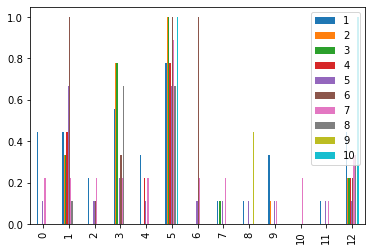

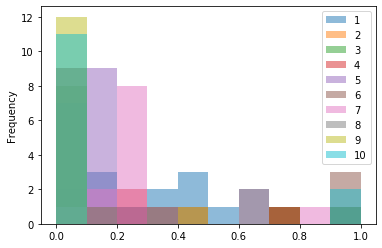

In [3]:
names = df.columns[0:10]
scaler = MinMaxScaler() 
scaled_df = scaler.fit_transform(df.iloc[:,0:10]) 
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df[10]= df[10]
scaled_df.iloc[0:13,1:11].plot.bar();
scaled_df.iloc[0:13,1:11].plot.hist(alpha=0.5)

### Creation of train and validation sets

Para la posterior evalucaión de la clasificación, creamos un set de entrenamiento y otro menor de validación.

In [4]:
x=scaled_df.iloc[0:500,1:10].values.transpose()
y=df.iloc[0:500,10:].values.transpose()
xval=scaled_df.iloc[501:683,1:10].values.transpose()
yval=df.iloc[501:683,10:].values.transpose()

## Netwotk Development

### Declaring nn

Declaramos la red neuronal con los valores de entrenamiento y un learning rate de 0.02. La red funciona con una arquitectura [9 - 15 - 1], la cual utiliza funciones de salida lineales en la capa intermedia y una sigmoidal en la de salida. Utiliza como función de error, en lugar del clásico MSE, el Cross-Entropy. 
El algortimo de aprendizaje utilizado es el descenso por gradiente, el cual implementa el algoritmo de backpropagation.

Cost after iteration 0: 0.257234
Cost after iteration 100: 0.214396
Cost after iteration 200: 0.181876
Cost after iteration 300: 0.157299
Cost after iteration 400: 0.137974
Cost after iteration 500: 0.122121
Cost after iteration 600: 0.108730
Cost after iteration 700: 0.097256
Cost after iteration 800: 0.087392
Cost after iteration 900: 0.078940
Cost after iteration 1000: 0.071733
Cost after iteration 1100: 0.065622
Cost after iteration 1200: 0.060462
Cost after iteration 1300: 0.056120
Cost after iteration 1400: 0.052474
Cost after iteration 1500: 0.049417
Cost after iteration 1600: 0.046855
Cost after iteration 1700: 0.044707
Cost after iteration 1800: 0.042903
Cost after iteration 1900: 0.041385
Cost after iteration 2000: 0.040104
Cost after iteration 2100: 0.039019
Cost after iteration 2200: 0.038094
Cost after iteration 2300: 0.037303
Cost after iteration 2400: 0.036621
Cost after iteration 2500: 0.036029
Cost after iteration 2600: 0.035512
Cost after iteration 2700: 0.035056
Cost

Cost after iteration 23700: 0.028346
Cost after iteration 23800: 0.028331
Cost after iteration 23900: 0.028317
Cost after iteration 24000: 0.028303
Cost after iteration 24100: 0.028290
Cost after iteration 24200: 0.028276
Cost after iteration 24300: 0.028263
Cost after iteration 24400: 0.028250
Cost after iteration 24500: 0.028238
Cost after iteration 24600: 0.028226
Cost after iteration 24700: 0.028214
Cost after iteration 24800: 0.028202
Cost after iteration 24900: 0.028191
Cost after iteration 25000: 0.028180
Cost after iteration 25100: 0.028169
Cost after iteration 25200: 0.028158
Cost after iteration 25300: 0.028148
Cost after iteration 25400: 0.028138
Cost after iteration 25500: 0.028128
Cost after iteration 25600: 0.028119
Cost after iteration 25700: 0.028109
Cost after iteration 25800: 0.028100
Cost after iteration 25900: 0.028092
Cost after iteration 26000: 0.028083
Cost after iteration 26100: 0.028075
Cost after iteration 26200: 0.028067
Cost after iteration 26300: 0.028059
C

Cost after iteration 46300: 0.028249
Cost after iteration 46400: 0.028252
Cost after iteration 46500: 0.028255
Cost after iteration 46600: 0.028258
Cost after iteration 46700: 0.028260
Cost after iteration 46800: 0.028263
Cost after iteration 46900: 0.028266
Cost after iteration 47000: 0.028269
Cost after iteration 47100: 0.028272
Cost after iteration 47200: 0.028275
Cost after iteration 47300: 0.028278
Cost after iteration 47400: 0.028281
Cost after iteration 47500: 0.028284
Cost after iteration 47600: 0.028287
Cost after iteration 47700: 0.028290
Cost after iteration 47800: 0.028293
Cost after iteration 47900: 0.028296
Cost after iteration 48000: 0.028299
Cost after iteration 48100: 0.028302
Cost after iteration 48200: 0.028305
Cost after iteration 48300: 0.028307
Cost after iteration 48400: 0.028310
Cost after iteration 48500: 0.028313
Cost after iteration 48600: 0.028316
Cost after iteration 48700: 0.028319
Cost after iteration 48800: 0.028322
Cost after iteration 48900: 0.028325
C

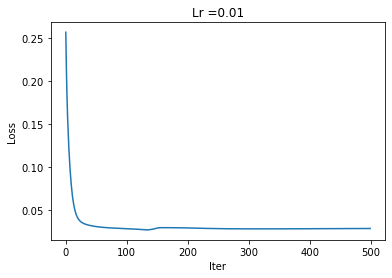

In [9]:
nn = NeuronalNetwork(x,y,0.01,0.7)
nn.gradient_descend(50000)

### Predict and comparing training acurrancy vs validation acurrancy

Comparamos el acierto desempeñado por nuestra red neuronal, tanto en el test de entrenamiento como en el de validación. Se prefiere un mejor resultado en el de validación que en el de entrenamiento, ya que esto es signo de que, a priori, no existe ningún tipo de problema de vias o de variance.

In [10]:
pred_train = nn.predict(x, y)
pred_test = nn.predict(xval, yval)

Acc: 0.9340000000000003
Acc: 1.0


### Function to plot the performance of the nn (skewed classes)

In [11]:
def plotCf(a,b,t):
    cf =confusion_matrix(a,b)
    plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
    plt.colorbar()
    plt.title(t)
    plt.xlabel('0         Predicted         1')
    plt.ylabel('1          Actual            0')
    tick_marks = np.arange(len(set(a))) # length of classes
    class_labels = ['0','1']
    plt.xticks(np.ndarray([0,1]))
    plt.yticks(np.ndarray([0,1]))
    for i,j in itertools.product(range(cf.shape[0]),range(cf.shape[1])):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] > (cf.max()*0.7) else 'black')
    plt.show();


### Check how well it predict!

Dado los buenos resultados obtenidos, se procede a hacer la predicción, tanto con los datos de entrenamiento como con los de validación. 

Acc: 0.9340000000000003


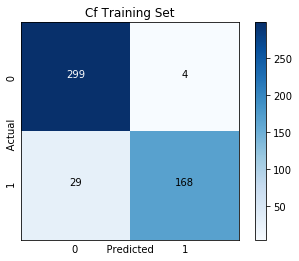

Acc: 1.0


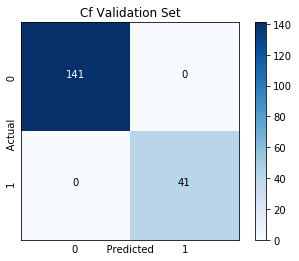

In [13]:
nn.threshold=0.9#0.85
nn.X,nn.Y=x, y 
target=np.around(np.squeeze(y), decimals=0).astype(np.int)
predicted=np.around(np.squeeze(nn.predict(x,y)), decimals=0).astype(np.int)
plotCf(target,predicted,'Cf Training Set')

nn.X,nn.Y=xval, yval 
target=np.around(np.squeeze(yval), decimals=0).astype(np.int)
predicted=np.around(np.squeeze(nn.predict(xval,yval)), decimals=0).astype(np.int)
plotCf(target,predicted,'Cf Validation Set')